# Zernike polynomials

This notebook is used to better understand the Zernike Python package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import zernike

In [2]:
# Create Zernike polynomials up to radial degree 3
z = zernike.RZern(3)
print(z)

In [3]:
# The number of terms in the polynomial
print(z.nk)

10


In [4]:
# Create the grid to evaluate the polynomials on
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)
z.make_cart_grid(xx, yy)

In [5]:
# Evaluate the polynomials for a single Zernike coefficient
# Indexes are the same as in the Noll convention, except that they start at 0
c = np.zeros(z.nk)
c[4] = 1.0
phi = z.eval_grid(c, matrix=True)

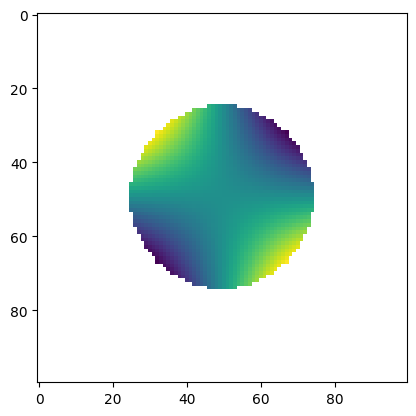

In [6]:
plt.imshow(phi)
plt.show()

In [7]:
phi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
phi.shape

(100, 100)

In [9]:
phi[~np.isnan(phi)].max()

2.4492398203525303

In [10]:
dx = x[1] - x[0]
dy = y[1] - y[0]
(dx * dy * phi[~np.isnan(phi)]).sum()

4.683753385137379e-17

### Aberrated Pupil

In [11]:
from leb.freeze import Pupil


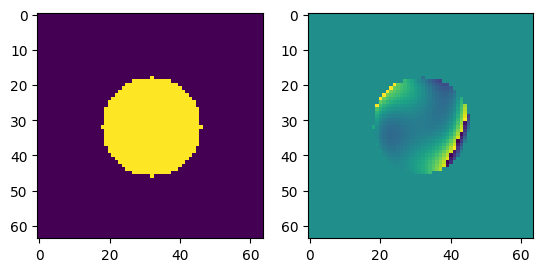

In [12]:
zernike_coeffs = [0.3, 0.5, 0.3, 0.6, 0.8, 0.3, 0.1, 0.2, 0.1, 0.3, 0.1, 0.3]
#zernike_coeffs = np.zeros((10,))
#zernike_coeffs[6] = 1.0


pupil = Pupil.from_system_params(num_px=64, px_size_um=2.4, mag=2, wavelength_um=0.529, na=0.1, zernike_coeffs=zernike_coeffs)

# plot the amplidute and phase of the pupil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(np.abs(pupil.p))
axs[1].imshow(np.angle(pupil.p))
plt.show()


In [13]:
print(f"dk: {pupil.dk}")
print(f"k_S: {pupil.k_S}")
print(f"radius:{pupil.pupil_radius_px}")


dk: 0.0818123086872342
k_S: 5.235987755982989
radius:14


### Unaberrated pupil

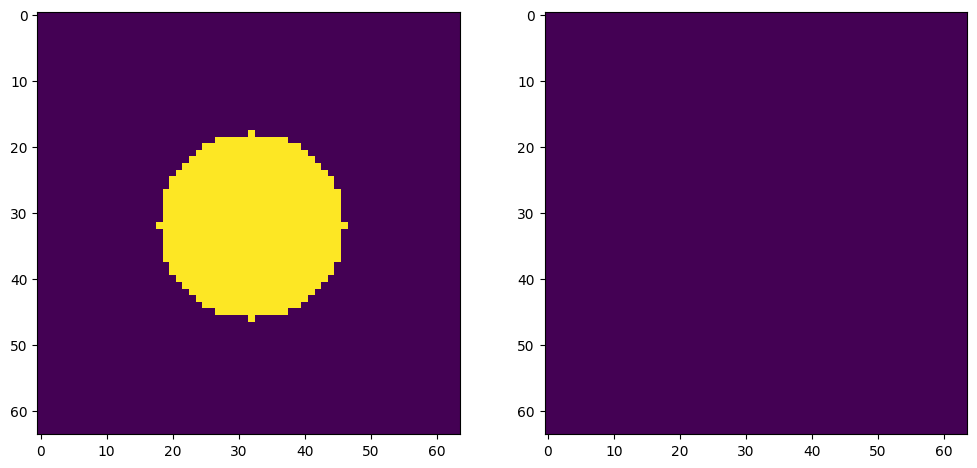

In [14]:
pupil = Pupil.from_system_params(num_px=64, px_size_um=2.4, mag=2, wavelength_um=0.529, na=0.1, zernike_coeffs=None)

# plot the amplidute and phase of the pupil
fig, axs = plt.subplots(1, 2, figsize=(12,16))
axs[0].imshow(np.abs(pupil.p))
axs[1].imshow(np.angle(pupil.p))
plt.show()